*In this Notebook We will Implement Sport Celebrity Classification project.*

We will perform various steps to implement this projects which are as follows:

# **1. Problem Definition**
-here we will build a classification model which will take a image from given category and try to predict which sportman is there in the given image.

we will built our model for following 4 categories:

1. Cristiano Ronaldo
2. Michael Phelps
3. Roger Federer
4. Virat Kohli

we will use concept of Transfer Learning to get better prediction accuracy.

I will Try to give some basic explaination in the each cell by commenting the objective of perticular cell we execute.

so let's get into it now..!!





*For building any Data Science model we first need enough,preprocessed data to feed into our model for training.*

*Our model will learn some patters from those training data and once the training phase gets complete we can use that model to do predictions on some unknown data.*

*so to train our model we need some good quality data which we will feed into our model.*

here comes the another step of our Data Science Project life cycle.

# **2. Data Collection or Data Gathering**

- for this perticular project i collected data by web scraping from couple of websites. I used Google crome extension *Fatkun batch Download Image*.

3rd and One of the Most important step in any data science project is ....

# **3. Data Cleaning**
-The data we collected from any website or from any real time entities will always tends to be ambiguous and dirty.

-we need to clean those data to make it useful for our model.

-there are tons of data cleaning techniques out there to clean our different types of data like text data,table data,video frames,image data(which is in our case here).

-since we are building very basic and not to complex image classification model here, i didn't used any of the computationally complex data cleaning technique here.

-I manually did some basic cleaning on our data like,

    -removed some undesirable backgrounds
    -removed some noisy/ambiguous images from gathered data
    -cropped desired parts of data
    -cropped out someone else from group photo etc.


so,enough of talking now let's write out first line of code for our model .

In [2]:
#Import necessary libraries 
import pandas as pd 
import numpy as np


In [122]:
train_data_path="/content/drive/My Drive/Sport Celebrity Classification Dataset/train"
test_data_path="/content/drive/My Drive/Sport Celebrity Classification Dataset/test"

In [4]:
from keras.preprocessing.image import ImageDataGenerator

In [155]:
#we will perfrom some Data Augmentation on our small dataset to get some more training data
train_data_gen=ImageDataGenerator(rescale=1./255,
                                 zoom_range=0.2,
                                 shear_range=0.2,
                                 horizontal_flip=True)
test_data_gen=ImageDataGenerator(rescale=1./255)

In [156]:
#get out dataset
training_set=train_data_gen.flow_from_directory(train_data_path,
                                               target_size=(224,224),
                                               batch_size=32,
                                               class_mode='categorical')
test_set=test_data_gen.flow_from_directory(test_data_path,
                                          target_size=(224,224),
                                          batch_size=32,
                                          class_mode='categorical')

Found 320 images belonging to 4 classes.
Found 48 images belonging to 4 classes.


next step now,
#**4**. Model Building and Optimization

In [125]:
#we will use pretrained convolutional neural network model here and make some changes to it as per requirement

from keras.applications.vgg16 import VGG16
from keras.models import Sequential
from keras.layers import Dense,Flatten,Convolution2D

In [126]:
image_size=[224,224]

In [157]:
#Initialize VGG16 model
vgg=VGG16(input_shape=image_size+[3],weights='imagenet',include_top=False)
#Use default weights and make layers trainable=False
for layer in vgg.layers:
    layer.trainable=False

In [158]:
#Flattet the output of vgg 
x=Flatten()(vgg.output)

In [159]:
#make a dense layer with 4 neurons since we have 4 categories
prediction=Dense(4,activation='softmax')(x)

In [160]:
#build a model with our desired output layer
from keras.models import Model
model=Model(inputs=vgg.input , outputs=prediction)
#checkout the summary of model (no of weight,parameters etc.)
model.summary()

Model: "functional_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)     

In [161]:
#Compile the Model
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [34]:
from keras.callbacks import EarlyStopping

In [35]:
es=EarlyStopping(monitor='val_loss',patience=5,verbose=1)

In [135]:
len(training_set)

10

In [188]:
len(test_set)

2

In [ ]:
#start training our model
hist=model.fit_generator(training_set,
                    validation_data=test_set,
                    epochs=25,
                    steps_per_epoch=len(training_set),
                    validation_steps=len(test_set))

In [39]:
#Visualize some plots for better understanding of accuracy and loss
import matplotlib.pyplot as plt

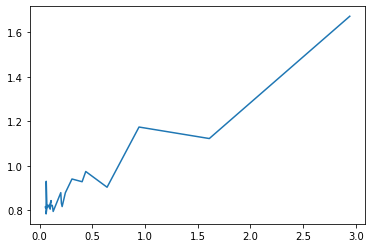

In [138]:
plt.plot(hist.history['loss'],hist.history['val_loss'])

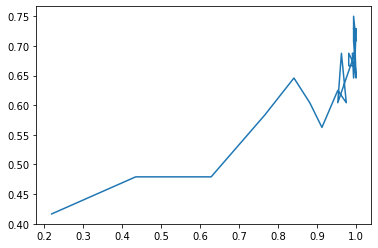

In [139]:
plt.plot(hist.history['accuracy'],hist.history['val_accuracy'])

In [57]:
from keras.preprocessing.image import load_img

In [ ]:
#predict independent images to get clear understanding
path="/content/drive/My Drive/Sport Celebrity Classification Dataset/test/Virat Kohli/vk (91).jpg"

a=load_img(path)
b=a.resize((224,224))
c=np.array(b)
d=c/255.0
e=d.reshape(1,224,224,3)
plt.matshow(d)
prediction=np.argmax(model.predict(e))
prediction

In [ ]:
import os 
import glob 

img_dir = "/content/drive/My Drive/Sport Celebrity Classification Dataset/test/Virat Kohli/" 
data_path = os.path.join(img_dir,'*g') 
files = glob.glob(data_path) 
for f1 in files:
    a=load_img(f1)
    b=a.resize((224,224))
    c=np.array(b)
    d=c/255.0
    e=d.reshape(1,224,224,3)
    #plt.matshow(d)
    prediction=np.argmax(first_model.predict(e))
    print(prediction)

In [183]:
from keras.models import load_model
first_model=load_model('sportcelebrityclassification.h5')